In [15]:
# определения

import pandas as pd
import numpy as np
import seaborn as sns
import re
import pickle
import pymorphy2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss


morph = pymorphy2.MorphAnalyzer()
vectorizer = CountVectorizer()
plt.style.use('dark_background')
# Options for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 50
pd.options.display.min_rows = 30

In [18]:
# здесь "на память" описываю операторы в одну - две строчки 

# PANDAS
# data.iloc[[0,3,100]] - показать строки по индексу 0,3,100
# data[data.Survived == 0 ] - отбор по значению
# data[data.Survived == 0 ][['Sex','Age']] - отбор  и показать только выбранные колонки
# data['new_col'] = data['Survived'] - в новую колонку добавить значение старой колонки
# data.rename(columns = {'new_col':'del_col'}) - переименовать колонку
# data = data.drop(['new_col'],axis = 'columns') - удалить колонку
# del data["column"] - еще один способ удалить колонку
# print(data.groupby(['Sex','Survived'])['PassengerId'].count()) - сгруппировать 
# по колонкам 'Sex','Survived' и подсчету по колонке PassengerId
# data.isna().sum() - показать сколько пустых значений в каждой колонке
# data.Survived.value_counts() - показать сколько уникальных значений в колонке  Survived
# data.Survived.max() - показать максимальное значение в колонке  Survived
# data.Survived.nlagerset(3) - показать 3 максимальных  значения в колонке  Survived
# data.Survived.idxmax() - показать индекс максимальноого значения в колонке  Survived
# data.loc[23] - показать строку 23
# data = data.dropna() - удалить все строки с пропусками
# data.Sex.replace('male', 0, inplace=True) - заменить значения в колонке Sex: mail - 0
# test_out = pd.DataFrame({'PassengerId': test_df.index,'Survived': preds})
# создать новый dataframe для выгрузки на кагл
# data = pd.read_excel("resolution_100.xlsx") - прочитать файл excel
# data.describe() - получаем описание фрэйма, макс, мин, количество и прочее  
# data.fillna(method='ffill', inplace=True) - заполнить все пустые предыдущими значениями
# data = pandas.get_dummies(data,columns=['columns']) - раскрытие строк через доп. столбцы
# data = pd.concat([data_train,data_test]) - объединение таблиц
# data = data.assign(type_age="") - добавить колонку
# data.loc[1,"type_age"] = "a" - записать значение в колонку по строке
# def valuation_formula(x, y): # заполнение ячеек через lambda
#   return x * y * 0.5
# data['price'] = data.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)
# pandas.pivot_table - сводная таблица
# for idx,row in anime[:2].iterrows(): - обход элементов dataframe
#    print(idx, row)
# data['price'] = data['price'].apply(функция) - применение функции к столбцу
# data.map({'cat': 'kitten', 'dog': 'puppy'}) - замена значений по словарю



# SEABORN
# sns.heatmap(data.corr()) - вывести график корреляций по всем колонкам

# SKLEARN
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# разбить данные на тренировочную и тестовую выборку
# 20 процентов на тестовую , случайность выборки зафиксирована
# accuracy_score(y_test,y_pred) - коэффециент проверки на проверочной выборке
# vectorizer.get_feature_names() - посмотреть словарь векторов текста
# чтобы получить сгенерированный словарь, из приведенной структуры CountVectorizer, 
# стоит отметить что порядок совпадает с матрице
# text_vector_array = text_vector.toarray() - покаазть матрицу


# PICKLE
# model = pickle.load(open("filename", 'rb')) - загрузка модели из файла
# pickle.dump(model, open("filename", 'wb')) - сохрванение модели в файл

# 

In [ ]:
# из примера титаник сайта кагл DecisionTreeClassifier
# dt = DecisionTreeClassifier(random_state=1)
# dt.fit(X_train, y_train)
# preds = dt.predict(X_test)
# acc = accuracy_score(y_true=y_test, y_pred=preds)
# f1 = f1_score(y_true=y_test, y_pred=preds)
# print(classification_report(y_true=y_test, y_pred=preds))

In [ ]:
# предсказание простое RandomForestClassifier
# clf = RandomForestClassifier(random_state=241)
# clf.fit(X, Y)
## расчет веса показателей
# importances = clf.feature_importances_
# print(importances)

In [ ]:
# использование GridSearchCV на примере RandomForestClassifier

# clf = RandomForestClassifier()

# здесь пишем какие параметры будет перебирать

# param_greed = {
#    "max_depth" : [2,5,10],
#    "criterion" : ['gini', 'entropy'],
#    "min_samples_split" : [2,5,10],
#    "min_samples_leaf" : [1,5,10],
#}

# пишем каие параметры перебираем scoring = как оцениваем  ,
# cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
#GS = GridSearchCV(clf,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
#GS.fit(X,Y)

# лучший показатель
#GS.best_score_

# лучшие параметры
# GS.best_params_

# обращаемся
# GS.best_estimator_.feature_importances_

# предсказываем
# GS.best_estimator_.predict(may_sample_dataframe)

In [2]:
# универсальные функции

# загрузать файл из csv
def read_csv(path,index_c = ""):
    if index_c == "":
        return pd.read_csv(path)
    else:
        return pd.read_csv(path,index_col=index_c)
    
# показать все уникальные значения во всех колонках
def columns_unique(data):
    for col in data.columns:
        print(col, data[col].unique())

# заполнить пустые значения средним значением
def null_to_mean(data,column):
    num_mean = data[column].mean()
    data[column].fillna(num_mean, inplace=True)

# заполнить пустые значения модой
def null_to_mode(data,column):
    num_mode  = data[column].mode().values[0]
    data[column].fillna(num_mode, inplace=True)

# функция для лемматизации
def lemmatize(text):
    text_str = str(text)
    text_str = re.sub(r'[^\w\s]+|[\d]+', r'',text_str).strip()
    words = text_str.split() # разбиваем текст на слова
    res = ""
    for word in words:
        p = morph.parse(word)[0]
        res = res + " " + p.normal_form
    return res

# провести лемматизацию датафрэйм
def lemma_dataframe(data,column):
    data[column] = data.apply(lambda row: lemmatize(row[column]), axis=1)
    
# векторизация, создание векторов
def vector_text(data,column):
    text = data[column]
    # создаем векторы
    return vectorizer.fit_transform(text)  

In [3]:
data = read_csv("gbm-data.csv")

In [5]:
y = data.Activity

In [7]:
X = data.iloc[:,1:]

In [9]:
# Разбиение на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.8, 
                                                    random_state=241)

In [12]:
# Создание и обучение модели
gb = GradientBoostingClassifier(n_estimators=250,
                                learning_rate=0.2,
                                verbose=True,
                                random_state=241)

In [13]:
gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.46s
         2           1.1715           10.19s
         3           1.1009            9.75s
         4           1.0529            9.47s
         5           1.0130            9.29s
         6           0.9740            9.28s
         7           0.9475            9.11s
         8           0.9197            9.01s
         9           0.8979            8.89s
        10           0.8730            8.80s
        20           0.7207            8.22s
        30           0.6055            7.75s
        40           0.5244            7.58s
        50           0.4501            7.29s
        60           0.3908            6.86s
        70           0.3372            6.45s
        80           0.3009            6.06s
        90           0.2603            5.68s
       100           0.2327            5.31s
       200           0.0835            1.73s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=241, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [17]:
# Получение значений лосса по итерациям
test_loss = list()
for i, y_pred in enumerate(gb.staged_decision_function(X_test)):
    y_pred = 1.0 / (1.0 + np.exp(- y_pred))
    test_loss.append([i + 1, log_loss(y_test, y_pred)])
test_loss = pd.DataFrame(test_loss, columns=['iter','loss'])

# Извлечение значения минимального лосса
test_loss[test_loss.loss==test_loss.loss.min()]

,iter,loss
36,37,0.530


      Iter       Train Loss   Remaining Time 
         1           1.0190           13.62s
         2           0.9192           11.12s
         3           0.8272           10.29s
         4           0.7834            9.81s
         5           0.7109            9.52s
         6           0.6368            9.43s
         7           0.5797            9.28s
         8           0.5610            9.11s
         9           0.5185            9.02s
        10           0.4984            8.89s
        20           0.1999            8.24s
        30           0.1313            7.73s
        40           0.0790            7.33s
        50           0.0511            7.10s
        60           0.0352            6.82s
        70           0.0245            6.41s
        80           0.0162            6.04s
        90           0.0114            5.66s
       100           0.0077            5.29s
       200           0.0004            1.64s
1.3606979892833755
0.5822942594278475


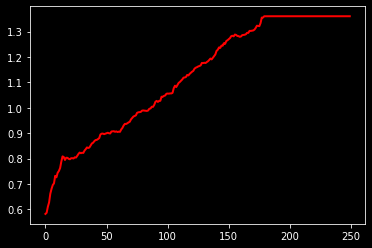

      Iter       Train Loss   Remaining Time 
         1           1.1255           11.13s
         2           1.0035           10.91s
         3           0.9386           10.83s
         4           0.8844           10.59s
         5           0.8381           10.51s
         6           0.7995           10.41s
         7           0.7559           10.39s
         8           0.7205           10.31s
         9           0.6958           10.13s
        10           0.6725            9.91s
        20           0.4672            8.77s
        30           0.3179            8.15s
        40           0.2274            7.86s
        50           0.1774            7.36s
        60           0.1394            6.91s
        70           0.1050            6.50s
        80           0.0805            6.09s
        90           0.0650            5.70s
       100           0.0511            5.33s
       200           0.0058            1.77s
1.0096535791235197
0.5584259973942154


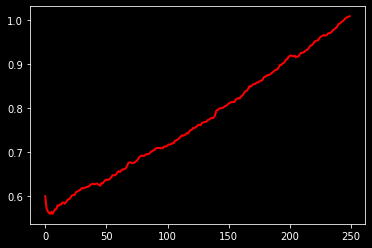

      Iter       Train Loss   Remaining Time 
         1           1.2095            9.41s
         2           1.1006            9.21s
         3           1.0240            9.12s
         4           0.9729            9.09s
         5           0.9387            8.99s
         6           0.8948            8.95s
         7           0.8621            8.85s
         8           0.8360            8.75s
         9           0.8171            8.69s
        10           0.7883            8.64s
        20           0.6029            8.08s
        30           0.4760            7.70s
        40           0.3879            7.31s
        50           0.3325            6.94s
        60           0.2759            6.58s
        70           0.2304            6.25s
        80           0.1969            5.92s
        90           0.1718            5.57s
       100           0.1404            5.21s
       200           0.0358            1.72s
0.7635630391348508
0.5432835808866866


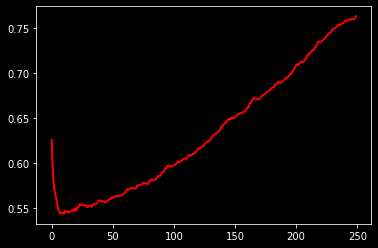

      Iter       Train Loss   Remaining Time 
         1           1.2613            9.13s
         2           1.1715            9.02s
         3           1.1009            8.93s
         4           1.0529            8.97s
         5           1.0130            8.89s
         6           0.9740            8.86s
         7           0.9475            8.75s
         8           0.9197            8.70s
         9           0.8979            8.63s
        10           0.8730            8.59s
        20           0.7207            8.05s
        30           0.6055            7.64s
        40           0.5244            7.26s
        50           0.4501            6.90s
        60           0.3908            6.55s
        70           0.3372            6.20s
        80           0.3009            5.85s
        90           0.2603            5.51s
       100           0.2327            5.16s
       200           0.0835            1.71s
0.6571164721284402
36
0.5301645204906471


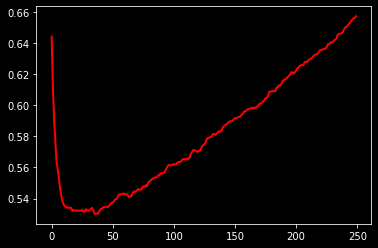

      Iter       Train Loss   Remaining Time 
         1           1.3199            9.35s
         2           1.2645            9.12s
         3           1.2170            9.07s
         4           1.1775            8.96s
         5           1.1404            8.89s
         6           1.1106            8.84s
         7           1.0844            8.78s
         8           1.0617            8.74s
         9           1.0411            8.71s
        10           1.0223            8.65s
        20           0.8864            8.14s
        30           0.7844            7.76s
        40           0.7176            7.36s
        50           0.6590            6.98s
        60           0.6120            6.61s
        70           0.5599            6.26s
        80           0.5242            5.90s
        90           0.4829            5.55s
       100           0.4473            5.20s
       200           0.2379            1.72s
0.6656662128911628
0.5259049090698129


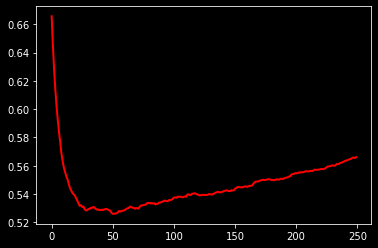

CPU times: user 43.1 s, sys: 388 ms, total: 43.5 s
Wall time: 43.8 s


In [18]:
%%time
from sklearn.metrics import log_loss
learning_rate=[1, 0.5, 0.3, 0.2, 0.1]
for i in range(5):
    cf=GradientBoostingClassifier( n_estimators=250, verbose=True, random_state=241,learning_rate=learning_rate[i])
    cf.fit(X_train,y_train)
    test_loss = np.empty(250)
    for m, y_decision in enumerate(cf.staged_decision_function(X_test)):
        y_pred_test = 1.0/(1.0 + np.exp(-y_decision))
        test_loss[m] = log_loss(y_test, y_pred_test)
    print(test_loss.max())
    if learning_rate[i]==0.2:
        print(min(range(len(test_loss)), key=test_loss.__getitem__))
    print(test_loss.min())

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.show()